## Temps d'exécution de l'algo en fonction du nombre total de variables

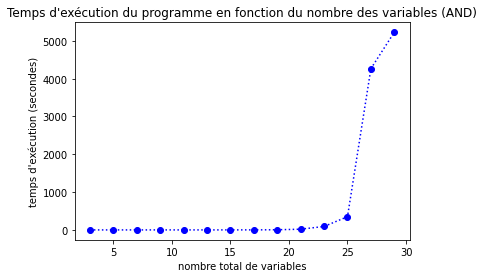

In [23]:
from main import *
import random
import time
from matplotlib import pyplot as plt

x = [2*i+1 for i in range(1,15)]
d=[0.00025963783264160156, 0.0007290840148925781, 0.0014755725860595703, 0.01738762855529785, 0.019290685653686523, 0.18069791793823242, 0.4209606647491455, 1.1066009998321533, 3.8922643661499023, 19.21696162223816, 91.02272963523865, 350.203200340271, 4265.824367761612, 5228.523772954941]
plt.xlabel("nombre total de variables")
plt.ylabel("temps d'exécution (secondes)")
plt.title("Temps d'exécution du programme en fonction du nombre des variables (AND)")
plt.plot(x,d, "b:o")


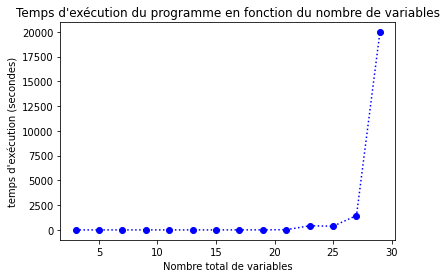

In [10]:
x = [2*i+1 for i in range(1,15)]
d=[0.0002567768096923828, 0.0007216930389404297, 0.0026099681854248047, 0.002732515335083008, 0.020221233367919922, 0.05972719192504883, 0.5661711692810059, 2.8182125091552734, 5.324091911315918, 23.751298666000366, 417.3912990093231, 372.72582244873047, 1451.848271369934, 19950.72563123703]
plt.xlabel("Nombre total de variables")
plt.ylabel("temps d'exécution (secondes)")
plt.title("Temps d'exécution du programme en fonction du nombre de variables")
plt.plot(x,d, "b:o")

## temps d'exécution en fonction du nombre des variables


In [13]:
def gen_fun(inp):
    def F(param):
        return param[inp]
    return F

def gen_output_fun(N,mode):
    assert mode in ["AND","OR"]
    if mode == "AND":
        def OF(param):
            a = True
            for i in range(N):
                a = a and param[str(i)]
            return a
    elif mode == "OR":
        def OF(param):
            a = False
            for i in range(N):
                a = a or param[str(i)]
            return a
    return OF

def gen_graph(N,mode):
    LF = []
    for i in range(N):
        f = gen_fun("exo"+str(i))
        LF.append(f)
    of = gen_output_fun(N,mode)
    LF.append(of)
    P = {str(i):(["exo"+str(i)],LF[i]) for i in range(N)}
    P["output"] = ([str(i) for i in range(N)],LF[N])
    C = {str(i):["output"] for i in range(N)}
    for i in range(N):
        C["exo"+str(i)] = str(i)
    return CausalGraph(P,C)

def gen_model(N,mode):
    U = dict()
    V = dict()
    for i in range(N):
        U["exo"+str(i)] = [False,True]
        V[str(i)] = [False,True]
    V["output"] = [False,True]
    Graph = gen_graph(N,mode)
    return Model(U,V,Graph)

def gen_sit(N,mode,u=dict()):
    Mod = gen_model(N,mode)
    if len(u) != N:
        u = {"exo"+str(i):bool(random.getrandbits(1)) for i in range(N)}
    print("u",u,"\n")
    v = dict()
    return Situation(Mod,u,v)

#temps d'exécution en fonction du nombre de variables.
d = []
for i in range(1,15):
    G = gen_graph(i,"OR")
    M = gen_model(i,"OR")
    S = gen_sit(i,"OR")
    S.set_val_v()
    fact = {'output':S.v['output']}
    foil =  {'output':not(S.v['output'])}
    start = time.time()
    #actual_cause_generator(fact,S)
    counterfactual_cause_generator(fact,foil,S)
    end = time.time()
    duree = end - start
    d.append(duree)
print(d)
    

x = [2*i+1 for i in range(1,15)]
plt.xlabel("nombre total de variables")
plt.ylabel("temps d'exécution (secondes)")
plt.title("Temps d'exécution du programme en fonction du nombre des variables (OR)")
plt.plot(x,d, "b:o")

u {'exo0': True} 

u {'exo0': True, 'exo1': False} 

u {'exo0': True, 'exo1': False, 'exo2': True} 

u {'exo0': True, 'exo1': False, 'exo2': False, 'exo3': False} 

u {'exo0': False, 'exo1': False, 'exo2': True, 'exo3': True, 'exo4': True} 

u {'exo0': True, 'exo1': False, 'exo2': False, 'exo3': True, 'exo4': True, 'exo5': False} 

u {'exo0': False, 'exo1': True, 'exo2': False, 'exo3': True, 'exo4': True, 'exo5': False, 'exo6': True} 

u {'exo0': False, 'exo1': True, 'exo2': True, 'exo3': True, 'exo4': True, 'exo5': True, 'exo6': False, 'exo7': False} 

u {'exo0': False, 'exo1': True, 'exo2': True, 'exo3': False, 'exo4': True, 'exo5': False, 'exo6': False, 'exo7': True, 'exo8': True} 

u {'exo0': True, 'exo1': True, 'exo2': True, 'exo3': False, 'exo4': True, 'exo5': True, 'exo6': True, 'exo7': False, 'exo8': True, 'exo9': True} 



KeyboardInterrupt: 

## temps d'exécution en fonction de la profondeur du graphe causale


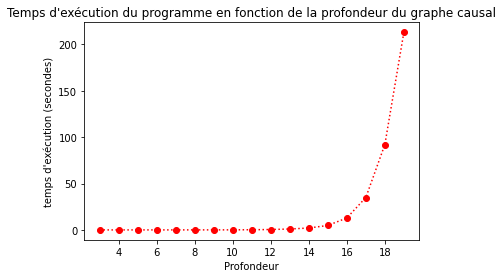

In [14]:
def gen_output_fun2(N,D,mode):
    assert mode in ["AND","OR"]
    if mode == "AND":
        def OF(param):
            a = True
            for i in range(1,N+1):
                a = a and param[str(i)+str(D-1)]
            return a
    elif mode == "OR":
        def OF(param):
            a = False
            for i in range(1,N+1):
                a = a or param[str(i)+str(D-1)]
            return a
    return OF
def gen_graph_2(N,D,mode):
    LF = []
    cpt = 0
    endo = []
    for i in range(1,N+1):
        tmp = []
        for j in range(0,D-1):
            f = gen_fun(str(i)+str(j))
            tmp.append(f)
        LF.append(tmp)
    #functions = [[F10,F11,F12,F13,F14....F1(D-1)],[[20,21,22,23,24....2(D-1)]]]
    #variables = [[10,11,12,13,14],[20,21,22,23,24],[30,31,32,33,34]] n0 ==> variable exogène numero n 
    of = gen_output_fun2(N,D,mode)
    LF.append([of])
    P = {}
    C = {}
    for i in range(1,N+1): 
        for j in range(D-1):
            P[str(i)+str(j+1)]= [str(i)+str(j)],LF[i-1][j]
            C[str(i)+str(j)]=[str(i)+str(j+1)] 
    P["output"] = ([str(i)+str(D-1) for i in range(1,N+1)],LF[N][0])
    for i in range(1,N+1):
        C[str(i)+str(D-1)]= ["output"]
    return CausalGraph(P,C)

def gen_model_2(N,D,mode):
    U = dict()
    V = dict()
    for i in range(1,N+1):
        U[str(i)+"0"] = [False,True]
        for j in range(1,D):
            V[str(i)+str(j)] = [False,True]
    V["output"] = [False,True]
    Graph = gen_graph_2(N,D,mode)
    return Model(U,V,Graph)

def gen_sit_2(N,D,mode,u=dict()):
    Mod = gen_model_2(N,D,mode)
    if len(u) != N:
        u = {str(i)+"0":bool(random.getrandbits(1)) for i in range(1,N+1)}
    v = dict()
    return Situation(Mod,u,v) 

def main_test(N,D,mode):
    G = gen_graph_2(N,D,mode)
    M = gen_model_2(N,D,mode)
    S = gen_sit_2(N,D,mode)
    S.set_val_v()
    fact = {'output':S.v['output']}
    foil =  {'output':not(S.v['output'])}
    start = time.time()
    #actual_cause_generator(fact,S)
    print(counterfactual_cause_generator(fact,foil,S))
    end = time.time()
    duree = end - start
    return duree

x = [i for i in range(3,20)]
d=[0.0030672550201416016, 0.004642009735107422, 0.011264801025390625, 0.013774871826171875, 0.021038532257080078, 0.03276348114013672, 0.0389707088470459, 0.07495713233947754, 0.19981908798217773, 0.42263293266296387, 0.985084056854248, 2.05607533454895, 4.79627537727356, 12.849720239639282, 34.91722369194031, 91.9634017944336, 212.94087266921997]
"""for i in range(3,20):
    d.append(main_test(2,i,"OR"))
print(d)"""
plt.xlabel("Profondeur")
plt.ylabel("temps d'exécution (secondes)")
plt.title("Temps d'exécution du programme en fonction de la profondeur du graphe causal")
plt.plot(x,d, "r:o")

## Génération de causes effectives 

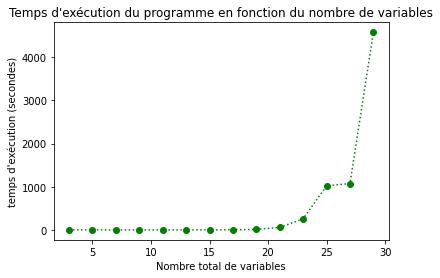

In [8]:
x = [2*i+1 for i in range(1,15)]
d=[0.0005240440368652344, 0.0011665821075439453, 0.0030035972595214844, 0.024313688278198242, 0.07074761390686035, 0.18674206733703613, 0.7423501014709473, 2.901808738708496, 11.527613162994385, 58.849146127700806, 255.89867877960205, 1021.5519692897797, 1073.5366797447205, 4576.807183265686]
plt.xlabel("Nombre total de variables")
plt.ylabel("temps d'exécution (secondes)")
plt.title("Temps d'exécution du programme en fonction du nombre de variables")
plt.plot(x,d, "g:o")